In [12]:
import numpy as np
from libemg.feature_extractor import FeatureExtractor
from libemg.utils import get_windows
import pandas as pd

In [13]:
df = pd.read_csv('EMG-data.csv')
print(df.shape)

(4237907, 11)


In [14]:
df[df['class']==2]

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
6424,6662,-0.00011,-0.00002,-0.00007,-0.00008,-0.00016,-0.00018,-0.00036,-0.00001,2,1
6425,6663,0.00014,0.00001,0.00021,0.00016,0.00012,-0.00025,-0.00021,0.00006,2,1
6426,6664,0.00014,0.00001,0.00021,0.00016,0.00012,-0.00025,-0.00021,0.00006,2,1
6427,6665,0.00014,0.00001,0.00021,0.00016,0.00012,-0.00025,-0.00021,0.00006,2,1
6428,6666,0.00014,0.00001,0.00021,0.00016,0.00012,-0.00025,-0.00021,0.00006,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4219628,32106,-0.00051,-0.00002,-0.00004,-0.00002,0.00015,-0.00014,0.00009,0.00016,2,36
4219629,32107,-0.00051,-0.00002,-0.00004,-0.00002,0.00015,-0.00014,0.00009,0.00016,2,36
4219630,32108,-0.00051,-0.00002,-0.00004,-0.00002,0.00015,-0.00014,0.00009,0.00016,2,36
4219631,32109,-0.00051,-0.00002,-0.00004,-0.00002,0.00015,-0.00014,0.00009,0.00016,2,36


In [15]:
gesture = ['Unmarked Data', 'Hand at Rest', 'Hand Clenched', 
           'Wrist Flexion', 'Wrist Extension', 'Radial Deviation',
           'Ulnar Deviation', 'Extended Plam']

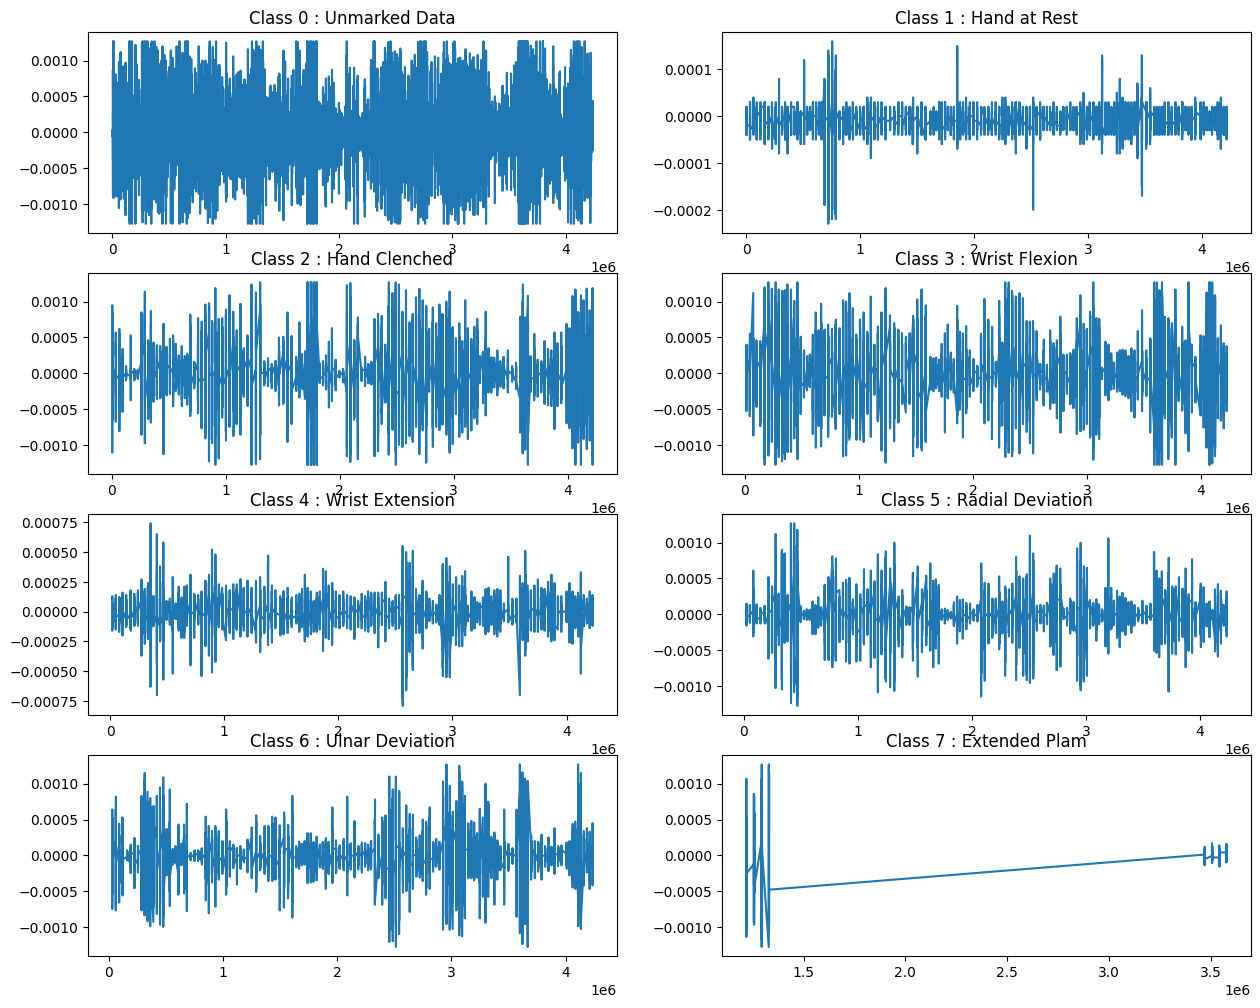

In [16]:
# channel 1
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12))
for i in range(8):
    class_sep = df[df['class']==i]
    channel_sep = class_sep['channel1']
    channel_sep

    # ploting the channel 1
    plt.subplot(4, 2, i+1)
    plt.plot(channel_sep)
    plt.title("Class "+str(i)+ " : "+gesture[i])

plt.show()

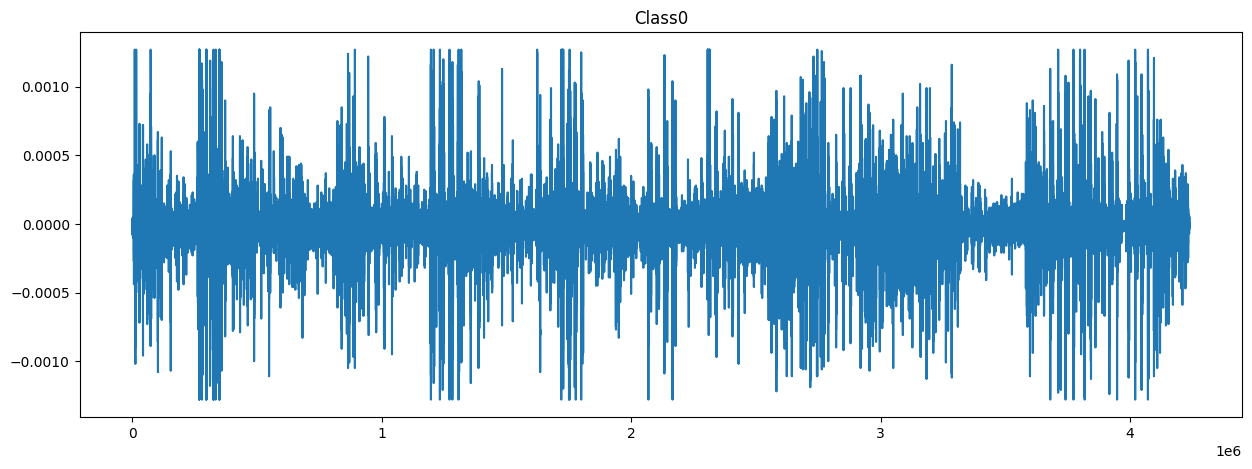

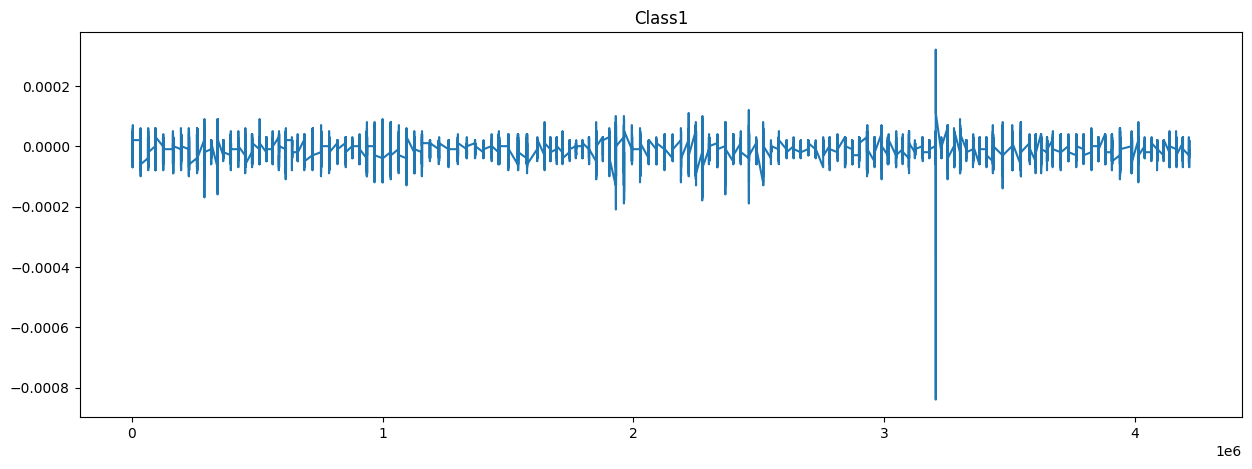

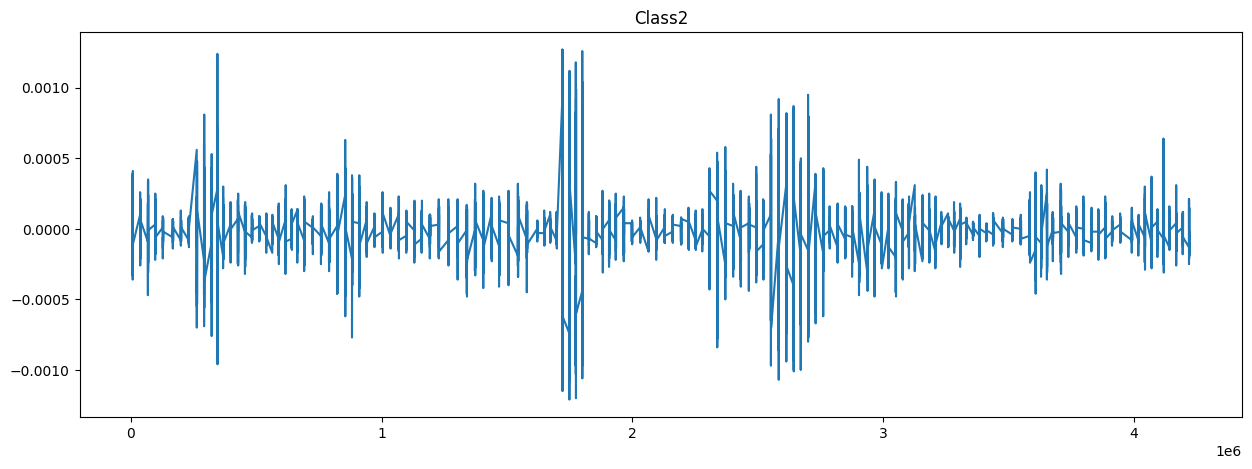

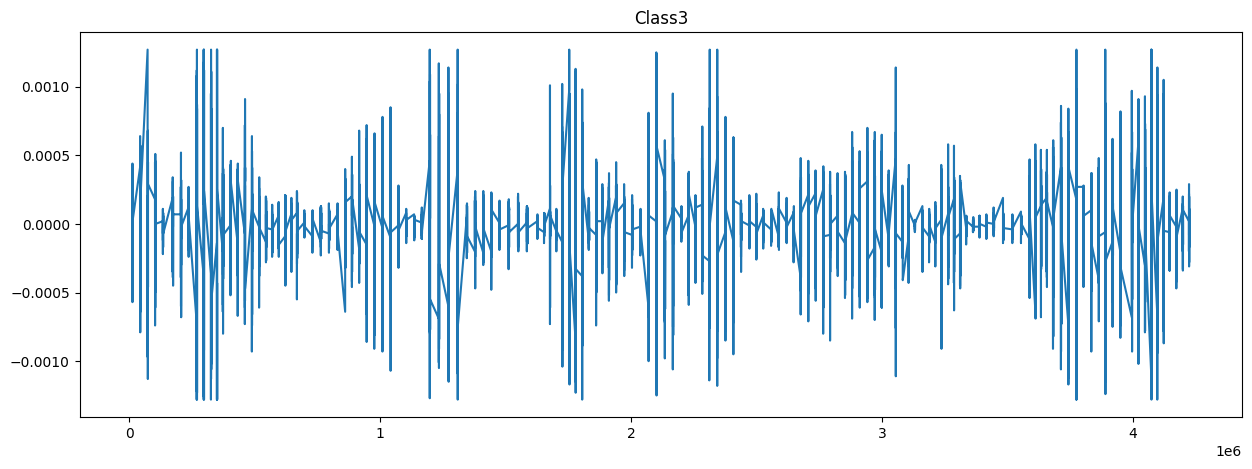

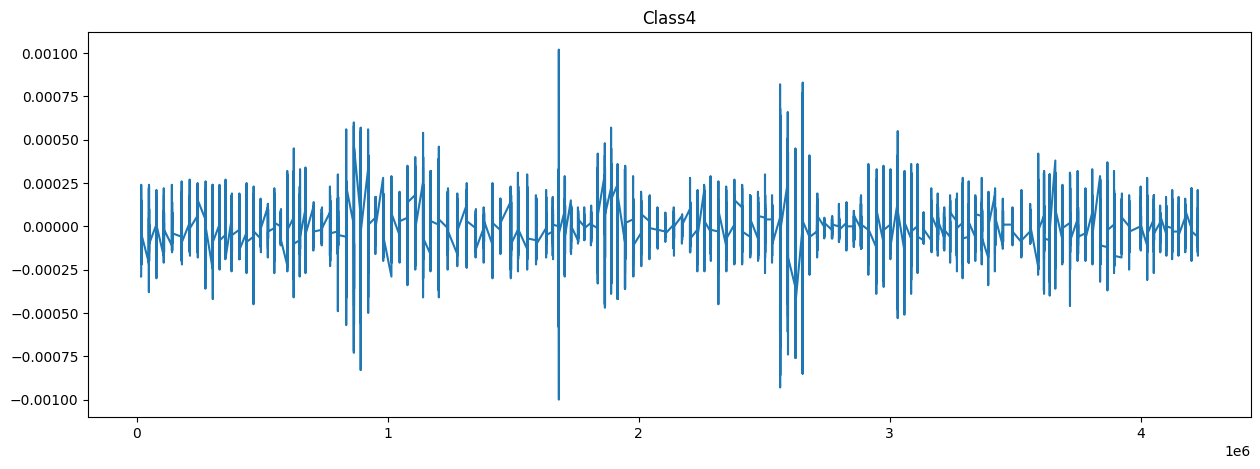

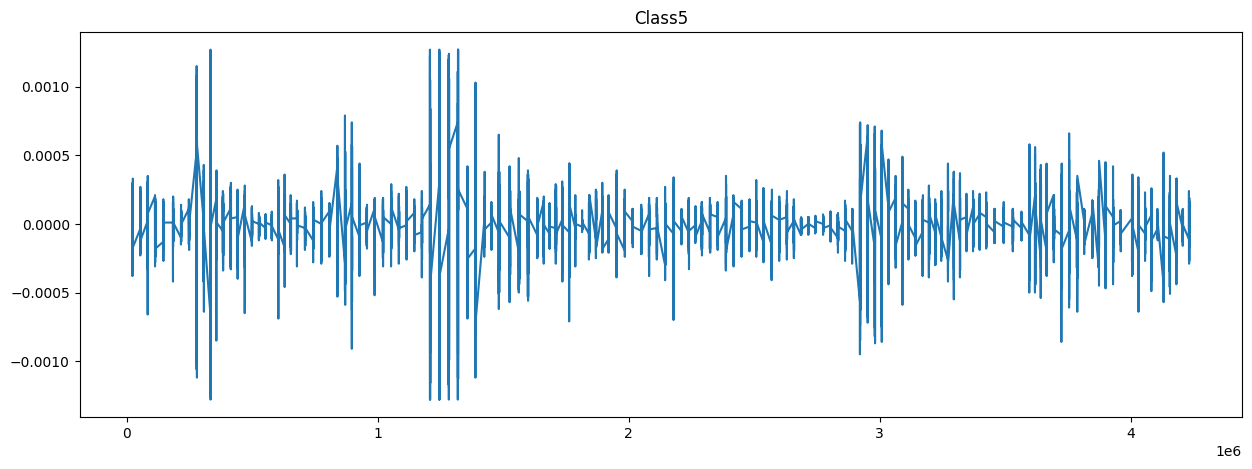

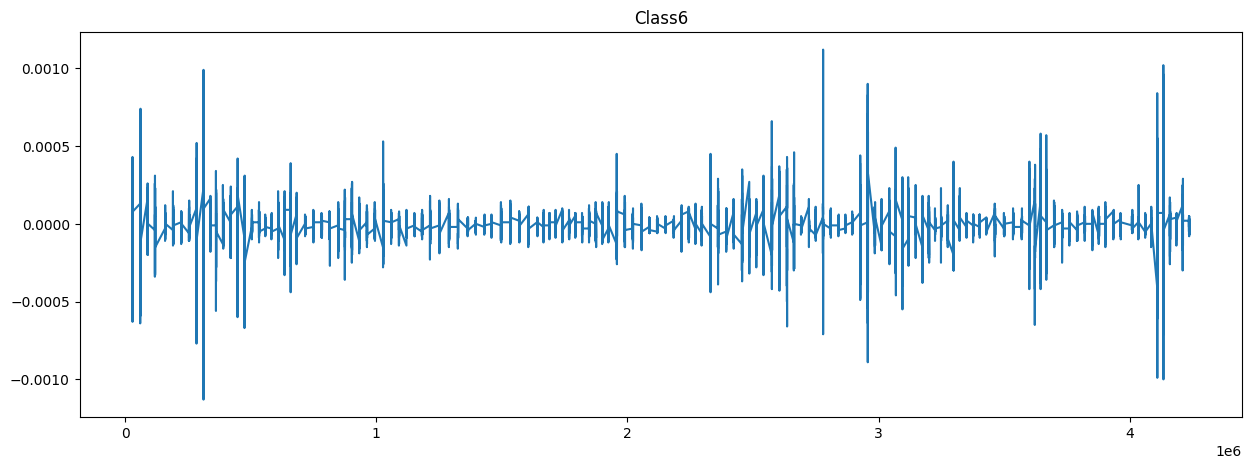

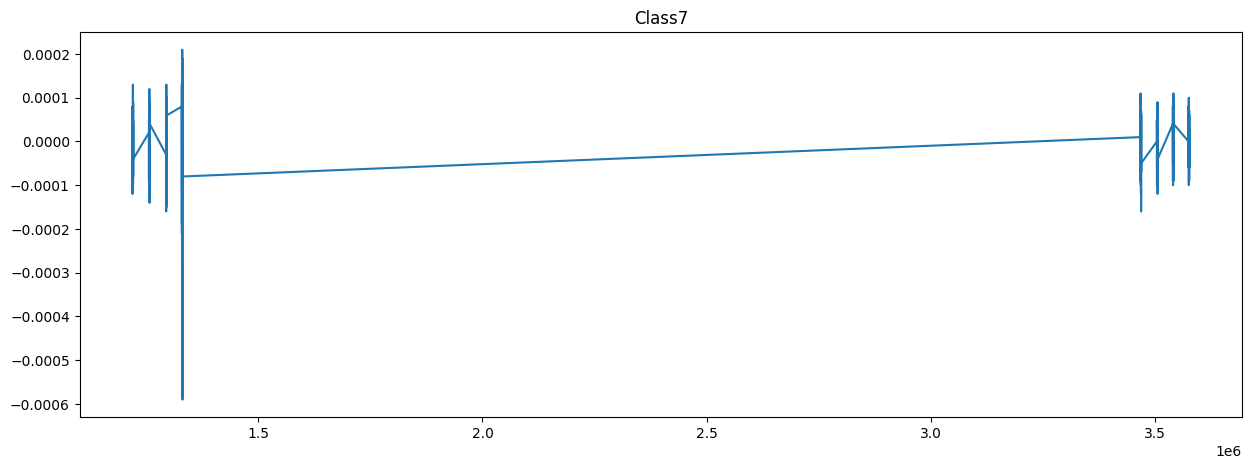

In [17]:
for i in range(8):
    class_sep = df[df['class']==i]
    channel_sep = class_sep['channel2']
    channel_sep

    # ploting the channel 1
    plt.figure(figsize=(15, 5))
    plt.plot(channel_sep)
    plt.title("Class"+str(i))
    plt.show()

In [18]:
df_frame = df[['class']]
df_frame

,class
0,0
1,0
2,0
3,0
4,0
...,...
4237902,0
4237903,0
4237904,0
4237905,0


In [36]:
# Load data from a csv file:
data = np.loadtxt("created_data.csv", delimiter=",")
print(data.shape)
# Split the raw EMG into windows
windows = get_windows(data, data.shape[0], 1)

(3, 4)


In [37]:
data

array([[ 1.,  4.,  7., 10.],
       [ 2.,  5.,  8., 11.],
       [ 3.,  6.,  9., 12.]])

In [38]:
type(data)

numpy.ndarray

In [39]:
windows

array([[[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]]])

In [40]:
windows.shape

(1, 4, 3)

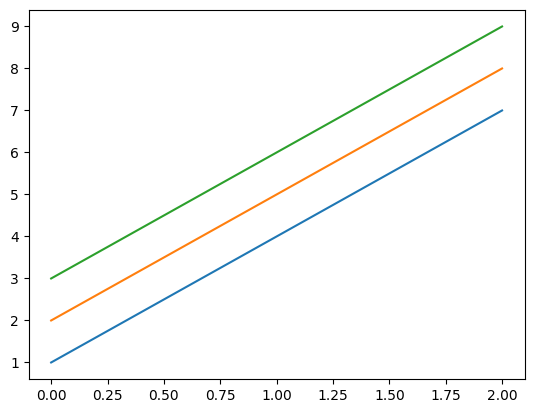

In [23]:
import matplotlib.pyplot as plt
plt.plot(windows[0])
plt.show()

In [24]:
fe = FeatureExtractor()
fe.get_feature_list()

['MAV',
 'ZC',
 'SSC',
 'WL',
 'LS',
 'MFL',
 'MSR',
 'WAMP',
 'RMS',
 'IAV',
 'DASDV',
 'VAR',
 'M0',
 'M2',
 'M4',
 'SPARSI',
 'IRF',
 'WLF',
 'AR',
 'CC',
 'LD',
 'MAVFD',
 'MAVSLP',
 'MDF',
 'MNF',
 'MNP',
 'MPK',
 'SKEW',
 'KURT',
 'RMSPHASOR',
 'PAP',
 'WLPHASOR',
 'MZP',
 'TM',
 'SM',
 'SAMPEN',
 'FUZZYEN',
 'DFTR',
 'ISD',
 'COR',
 'MDIFF',
 'MLK',
 'ACT',
 'MOB',
 'COMP',
 'WENG',
 'WV',
 'WWL',
 'WENT']

In [25]:
# Extract a list of features
feature_list = ['MAV', 'SSC', 'ZC', 'WL']
features_1 = fe.extract_features(feature_list, windows)

In [26]:
mavfeature = features_1['MAV']
print(mavfeature.shape)
mavfeature

(1, 3)


array([[2., 5., 8.]])

In [27]:
features_1['SSC']

array([[0, 0, 0]])

In [28]:
# Extract a predefined feature group
features_2 = fe.extract_feature_group('HTD', windows)

In [29]:
features_2['MAV']

array([[2., 5., 8.]])

In [30]:
features_2['SSC']

array([[0, 0, 0]])